In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
M_path = "cache/_M/"

In [3]:
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, N0_offset=2)
fisher.setup_bispectra(M_path)

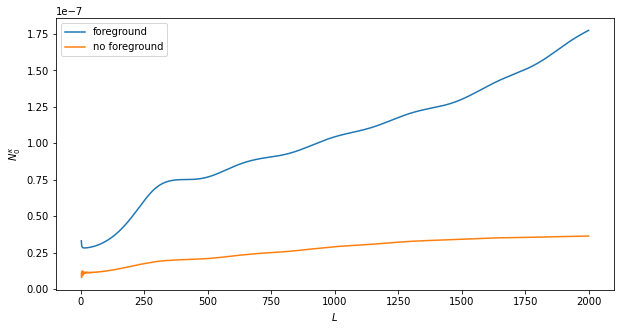

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:], label="foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")

N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)

N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:], label="no foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.legend()
plt.show()

In [5]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
print("No foreground (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.2830103156832127
kkw + one N_k= 1.9349673772232592
kkw + no N_k= 2.5478894875441522
ggw = 0.512785550542693
gkw = 7.578753170704513
IIw (353) = 0.35580923335229686
Ikw (353) = 1.199102138363631
Igw (353) = 8.036352552208477
Matrix([[kk, kg], [gk, gg]])
optimal kg= 9.501567427196564
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.6695800043109292
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 8.513226418231193
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 11.432096786132531
---------------------------
Time = 747.7040121555328


In [7]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (baseline) (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
# F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=545e9)
# print(f"IIw (545) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=545e9)
# print(f"Ikw (545) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=545e9)
# print(f"Igw (545) = {np.sqrt(F)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
# print(f"optimal kg= {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky, nu=545e9)
# print(f"optimal kI (545) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky, nu=545e9)
# print(f"optimal Ig (545) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta, f_sky, nu=545e9)
# print(f"optimal Igk (545) = {np.sqrt(F_opt)}")
# print("---------------------------")
# F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=857e9)
# print(f"IIw (857) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=857e9)
# print(f"Ikw (857) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=857e9)
# print(f"Igw (857) = {np.sqrt(F)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
# print(f"optimal kg= {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky, nu=857e9)
# print(f"optimal kI (857) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky, nu=857e9)
# print(f"optimal Ig (857) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta, f_sky, nu=857e9)
# print(f"optimal Igk (857) = {np.sqrt(F_opt)}")
# print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


Foreground (baseline) (S/N)
---------------------------
kkw = 0.4163445696401616
kkw + one N_k= 0.7697305407411986
kkw + no N_k= 1.1304367058954174
ggw = 0.24271144636733394
gkw = 2.723657157279136
IIw (353) = 0.1489438757348956
Ikw (353) = 0.47761038348049795
Igw (353) = 3.8109763500950784
Matrix([[kk, kg], [gk, gg]])
optimal kg= 3.2634836238652185
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 0.614956810505856
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 4.042068607153732
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 4.801162527977852
---------------------------
Time = 528.8401570320129


In [8]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (goal) (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
# F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=545e9)
# print(f"IIw (545) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=545e9)
# print(f"Ikw (545) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=545e9)
# print(f"Igw (545) = {np.sqrt(F)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
# print(f"optimal kg= {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky, nu=545e9)
# print(f"optimal kI (545) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky, nu=545e9)
# print(f"optimal Ig (545) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta, f_sky, nu=545e9)
# print(f"optimal Igk (545) = {np.sqrt(F_opt)}")
# print("---------------------------")
# F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=857e9)
# print(f"IIw (857) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=857e9)
# print(f"Ikw (857) = {np.sqrt(F)}")
# F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110, nu=857e9)
# print(f"Igw (857) = {np.sqrt(F)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
# print(f"optimal kg= {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky, nu=857e9)
# print(f"optimal kI (857) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky, nu=857e9)
# print(f"optimal Ig (857) = {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta, f_sky, nu=857e9)
# print(f"optimal Igk (857) = {np.sqrt(F_opt)}")
# print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

Foreground (goal) (S/N)
---------------------------
kkw = 0.6275915287197008
kkw + one N_k= 1.0400605187164012
kkw + no N_k= 1.4175341034604296
ggw = 0.29617958251246707
gkw = 3.7605589406517517
IIw (353) = 0.17766900848852868
Ikw (353) = 0.6474281077936178
Igw (353) = 4.745080482399211
Matrix([[kk, kg], [gk, gg]])
optimal kg= 4.587180062319763
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 0.8595108124377991
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 5.0366536597264995
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 6.222496214982418
---------------------------
Time = 628.4994432926178


In [5]:
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (baseline) (S/N)")
t0 = time.time()
bin_max = 4
Nbins = 2
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("ab", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt ab = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abk = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abkI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abkI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")
print("----------------------------")
t0 = time.time()
bin_max = 4
Nbins = 3
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width, 2*bin_width, 3*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("abc", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abc = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abck", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abck = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abckI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abckI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")
print("----------------------------")
t0 = time.time()
bin_max = 4
Nbins = 4
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width, 2*bin_width, 3*bin_width, 3*bin_width, 4*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("abcd", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcd = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdk = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdkI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdkI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")
print("----------------------------")
t0 = time.time()
bin_max = 4
Nbins = 5
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width, 2*bin_width, 3*bin_width, 3*bin_width, 4*bin_width, 4*bin_width, 5*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("abcde", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcde = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdek", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdek = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdekI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdekI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")
print("----------------------------")
t0 = time.time()
bin_max = 4
Nbins = 6
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width, 2*bin_width, 3*bin_width, 3*bin_width, 4*bin_width, 4*bin_width, 5*bin_width, 5*bin_width, 6*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("abcdef", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdef = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdefk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdefk = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdefkI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdefkI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")

Foreground (baseline) (S/N)
gal_bins = (0, 2.0, 2.0, 4.0)
----------------------------
Matrix([[aa, ab], [ba, bb]])
opt ab = 2.50059264048366
Matrix([[aa, ab, ak], [ba, bb, bk], [ka, kb, kk]])
opt abk = 3.8817208367233684
Matrix([[aa, ab, ak, ay], [ba, bb, bk, by], [ka, kb, kk, ky], [ya, yb, yk, yy]])
opt abkI = 4.44634084718108
Time = 401.9967339038849
----------------------------
gal_bins = (0, 1.3333333333333333, 1.3333333333333333, 2.6666666666666665, 2.6666666666666665, 4.0)
----------------------------
Matrix([[aa, ab, ac], [ba, bb, bc], [ca, cb, cc]])
opt abc = 3.2454834120068505
Matrix([[aa, ab, ac, ak], [ba, bb, bc, bk], [ca, cb, cc, ck], [ka, kb, kc, kk]])
opt abck = 4.267801239879821
Matrix([[aa, ab, ac, ak, ay], [ba, bb, bc, bk, by], [ca, cb, cc, ck, cy], [ka, kb, kc, kk, ky], [ya, yb, yc, yk, yy]])
opt abckI = 4.623120884094205
Time = 651.065292596817
----------------------------
gal_bins = (0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0)
----------------------------
Matrix([[aa, ab

In [6]:
t0 = time.time()
bin_max = 4
Nbins = 4
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width, 2*bin_width, 3*bin_width, 3*bin_width, 4*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("abcd", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcd = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdk = {np.sqrt(F)}")
F = fisher.get_optimal_bispectrum_Fisher("abcdkI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdkI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")

gal_bins = (0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0)
----------------------------
Matrix([[aa, ab, ac, ad], [ba, bb, bc, bd], [ca, cb, cc, cd], [da, db, dc, dd]])
opt abcd = 3.5425327806369644
Matrix([[aa, ab, ac, ad, ak], [ba, bb, bc, bd, bk], [ca, cb, cc, cd, ck], [da, db, dc, dd, dk], [ka, kb, kc, kd, kk]])
opt abcdk = 4.444479365392079
Matrix([[aa, ab, ac, ad, ak, ay], [ba, bb, bc, bd, bk, by], [ca, cb, cc, cd, ck, cy], [da, db, dc, dd, dk, dy], [ka, kb, kc, kd, kk, ky], [ya, yb, yc, yd, yk, yy]])
opt abcdkI = 4.722897223331814
Time = 1065.5536921024323


In [7]:
t0 = time.time()
bin_max = 4
Nbins = 6
bin_width = bin_max/Nbins
gal_bins = (0,bin_width,bin_width,2*bin_width, 2*bin_width, 3*bin_width, 3*bin_width, 4*bin_width, 4*bin_width, 5*bin_width, 5*bin_width, 6*bin_width)
print(f"gal_bins = {gal_bins}")
print("----------------------------")
F = fisher.get_optimal_bispectrum_Fisher("abcdefI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, gal_bins=gal_bins)
print(f"opt abcdefI = {np.sqrt(F)}")
t1 = time.time()
print(f"Time = {t1 - t0}")

gal_bins = (0, 0.6666666666666666, 0.6666666666666666, 1.3333333333333333, 1.3333333333333333, 2.0, 2.0, 2.6666666666666665, 2.6666666666666665, 3.333333333333333, 3.333333333333333, 4.0)
----------------------------
Matrix([[aa, ab, ac, ad, ae, az, ay], [ba, bb, bc, bd, be, bz, by], [ca, cb, cc, cd, ce, cz, cy], [da, db, dc, dd, de, dz, dy], [ea, eb, ec, ed, ee, ez, ey], [za, zb, zc, zd, ze, zz, zy], [ya, yb, yc, yd, ye, yz, yy]])
opt abcdefI = 4.1947758772501045
Time = 1148.7859148979187


Matrix([[kk]])
optimal k = 1.2652630052542106


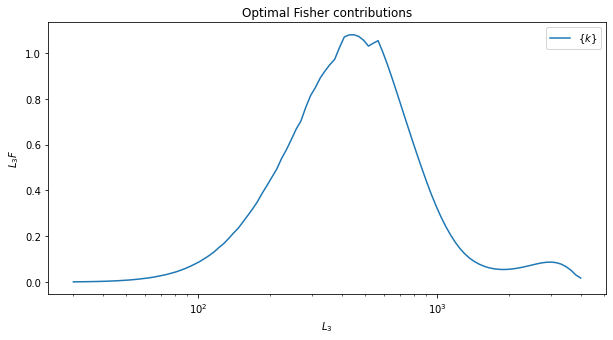

Time = 29.251630783081055


In [5]:
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
F_opt = fisher.get_optimal_bispectrum_Fisher("k", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal k = {np.sqrt(F_opt)}")
F_k = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_k, label="$\{k\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
optimal kg = 9.435453875437979


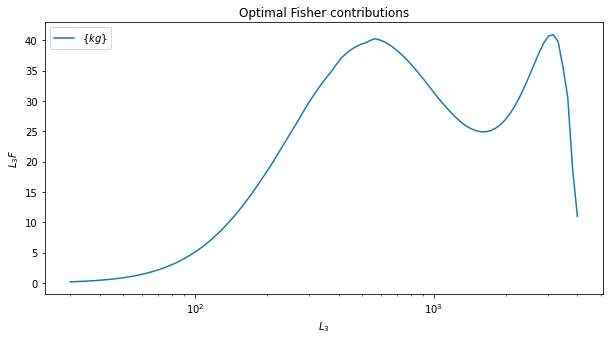

Time = 96.74299812316895


In [7]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal kg = {np.sqrt(F_opt)}")
F_kg = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kg, label="$\{kg\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
optimal kgI = 11.436587896632156


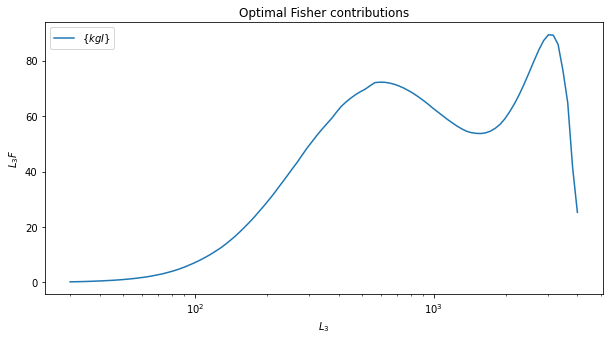

Time = 236.2916338443756


In [10]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kgI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal kgI = {np.sqrt(F_opt)}")
F_kgI = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kgI, label="$\{kgI\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
Matrix([[kk, ky], [yk, yy]])
Matrix([[gg, gy], [yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])


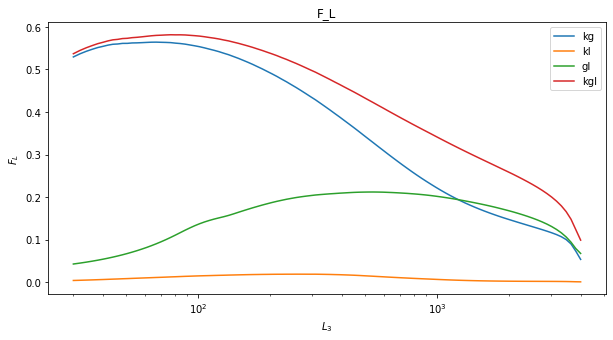

In [6]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
for typ in typs:
    Ls, F_L = fisher.get_F_L(typ, Ls=Ls, Ntheta=100, nu=353e9)
    plt.semilogx(Ls, F_L, label=f"{typ}")
plt.ylabel("$F_L$")
plt.xlabel("$L_3$")
plt.title("F_L")
plt.legend()
plt.show()

In [12]:
from cosmology import Cosmology
from scipy.interpolate import InterpolatedUnivariateSpline
cosmo = Cosmology()
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(8000)
omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

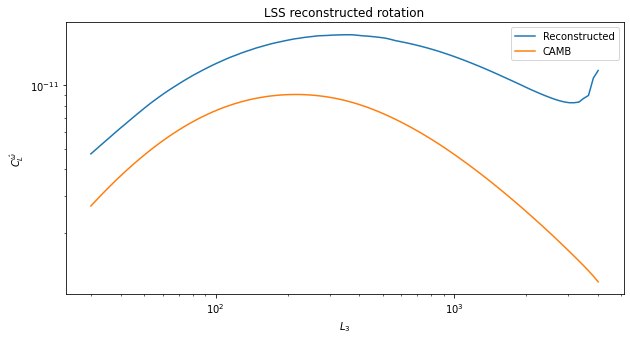

In [13]:
plt.loglog(Ls, omega_ps_spline(Ls)/F_L, label="Reconstructed")
plt.loglog(Ls, omega_ps_spline(Ls), label="CAMB")
plt.ylabel("$C^{\hat{\omega}}_{L}$")
plt.xlabel("$L_3$")
plt.title("LSS reconstructed rotation")
plt.legend()
plt.show()

In [5]:
Ntheta = 10
f_sky = 0.4
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=100, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls,Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Ls=Ls, Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Ls=Ls, Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

kkw = 1.2781494865826881
kkw + one N_k= 1.9303836132912384
kkw + no N_k= 2.5477602198259803
ggw = 0.5120445429247056
gkw = 7.58218683497142
IIw (353) = 0.3526984180716269
Ikw (353) = 1.183707881305799
Igw (353) = 7.977828073375072
----------------------------
Matrix([[kk, kg], [gk, gg]])
optimal kg= 9.477908742612884
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.654025287238965
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 8.505516244928927
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 11.40613402226931
----------------------------
Time = 1142.9397559165955


In [6]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
print("No foreground (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.2830103156832127
kkw + one N_k= 1.9349673772232592
kkw + no N_k= 2.5478894875441522
ggw = 0.512785550542693
gkw = 7.578753170704513
IIw (353) = 0.35580923335229686
Ikw (353) = 1.199102138363631
Igw (353) = 8.036352552208477
----------------------------
Time = 30.30735492706299


In [6]:
Ntheta = 100
f_sky = 0.4
Ls1 = np.arange(30,40,1)
Ls2 = np.logspace(1, 3, 400)*4
Ls = np.concatenate((Ls1,Ls2))
t0 = time.time()
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls,Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

kkw = 1.2967602037989991
kkw + one N_k= 1.9234060884160726
kkw + no N_k= 2.5417266581829745
ggw = 0.5132330712664722
gkw = 7.625156489683238
IIw (353) = 0.3472862945118578
Ikw (353) = 1.1901465557241906
Igw (353) = 8.146176099136438
----------------------------
Matrix([[kk, kg], [gk, gg]])
optimal kg= 9.552446245848772
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.674050909370598
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 8.543117077794081
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 11.478698407983527
----------------------------
Time = 3320.4127418994904


In [7]:
Ntheta = 100
f_sky = 0.4
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 50)*4
Ls = np.concatenate((Ls1,Ls2))
t0 = time.time()
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls,Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

kkw = 1.250107925898242
kkw + one N_k= 1.7950174576598177
kkw + no N_k= 2.4421461434285185
ggw = 0.49528816748670357
gkw = 7.582036393572568
IIw (353) = 0.34591952288237376
Ikw (353) = 1.192393017896599
Igw (353) = 7.925103250323312
----------------------------
Matrix([[kk, kg], [gk, gg]])
optimal kg= 9.345437302213641
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.6137222162779905
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 8.433622010597842
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 11.261989360099065
----------------------------
Time = 227.37876415252686


In [8]:
Ntheta = 50
f_sky = 0.4
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
t0 = time.time()
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls,Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

kkw = 1.2800656737015734
kkw + one N_k= 1.866242516523901
kkw + no N_k= 2.4974153734512763
ggw = 0.508716551970369
gkw = 7.608172794980971
IIw (353) = 0.34865962336124734
Ikw (353) = 1.1921441907054184
Igw (353) = 7.9925564063642796
----------------------------
Matrix([[kk, kg], [gk, gg]])
optimal kg= 9.459577233189735
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.6466546424989463
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 8.50195722777155
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 11.380852459681957
----------------------------
Time = 365.54687690734863


In [11]:
def get_Ls_sample(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

149.6
689.1090909090909
988.2727272727273
120.8
358.4545454545455
933.1636363636364
126.8
334.83636363636367
838.6909090909091
27.588377237319946


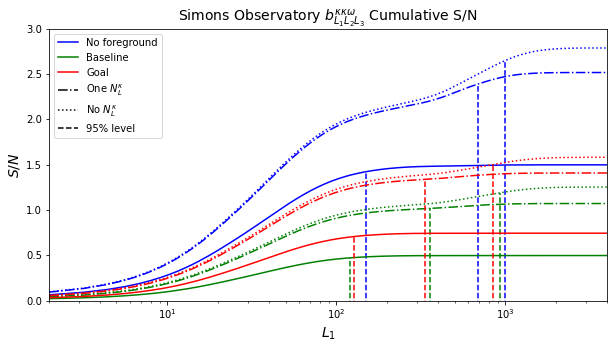

In [12]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red"]
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["No foreground", "Baseline", "Goal"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 3)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

120.8
126.8
547.4000000000001
531.6545454545455
2428.77245508982
2264.1676646706587


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


988.2727272727273


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


941.0363636363637


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2578.4131736526947


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2428.77245508982


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2383.880239520958


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2234.2395209580836
66.37088084220886


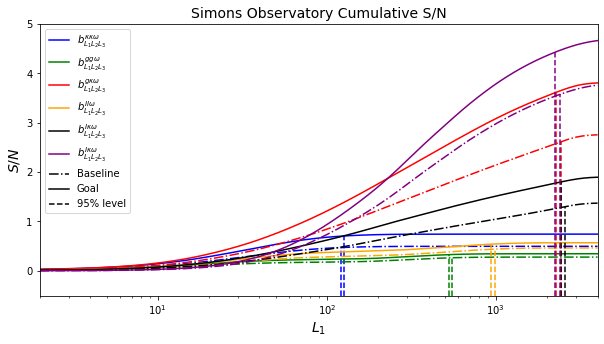

In [15]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red", "orange", "k", "purple"]
N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["Baseline", "Goal"]
bi_labels = ["$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ ", "$b_{L_1L_2L_3}^{gg\omega}$ ", "$b_{L_1L_2L_3}^{g\kappa\omega}$ ", "$b_{L_1L_2L_3}^{II\omega}$ ", "$b_{L_1L_2L_3}^{I\kappa\omega}$", "$b_{L_1L_2L_3}^{I\kappa\omega}$"]
linestyles = ["dashdot", "-"]
offsets = [2,2]
N0_ell_factors = [False, False] 
t0 = time.time()
for jjj in range(len(colors)):
    plt.plot([1e10], [1e10], label=bi_labels[jjj], color=colors[jjj])
    for iii , N0_file in enumerate(N0_files):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        if jjj == 0:
            F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 1:
            F_conv_rot = fisher.get_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 2:
            F_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 3:
            F_conv_rot = fisher.get_cib_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 4:
            F_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 5:
            F_conv_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        plt.semilogx(Ls, SNs, color=colors[jjj], linestyle=linestyles[iii])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[jjj], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.plot([1e10], [1e10], label="Baseline", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="Goal", linestyle="-", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.title("Simons Observatory Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.ylim(-0.5, 5)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

Time = 97.16883206367493


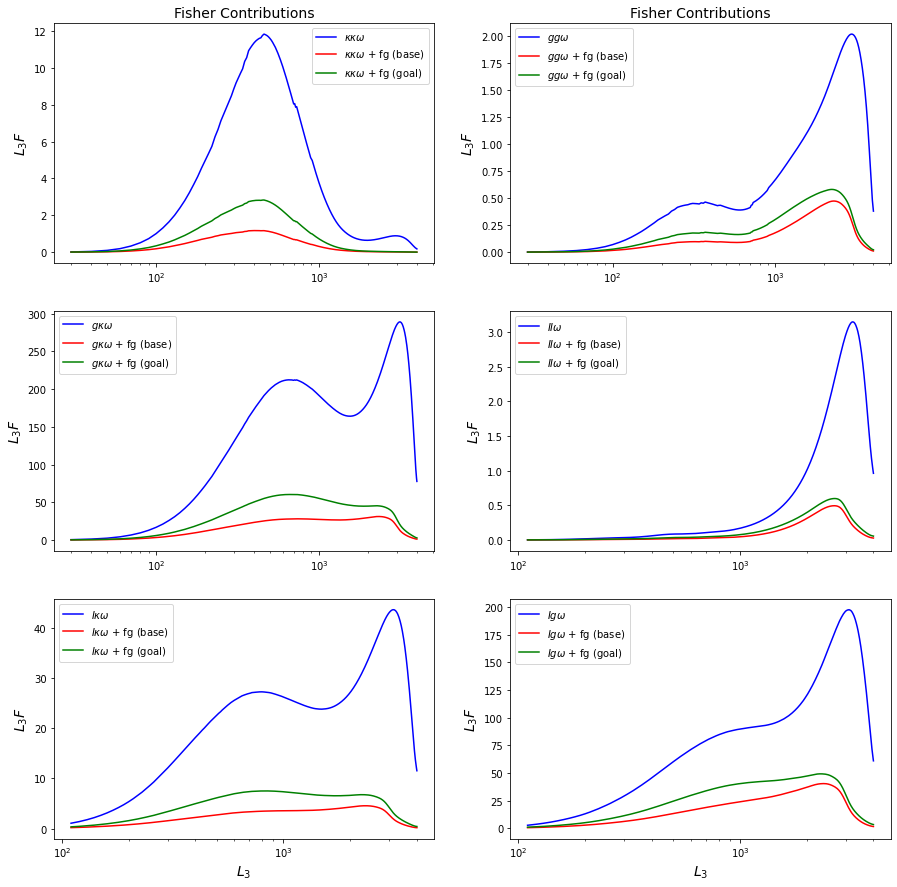

In [14]:
plt.rc('figure', facecolor='w')
dL = 10
Ntheta=100
t0 = time.time()
label_typs = ["$\kappa\kappa\omega$", "$gg\omega$", "$g\kappa\omega$", "$II\omega$", "$I\kappa\omega$", "$Ig\omega$"]
typs = ["kkw", "ggw", "gkw", "IIw", "Ikw", "Igw"]
lmins = [30,30,30,110,110,110]
fig, ax = plt.subplots(3,2, figsize=[15, 15])
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["", " + fg (base)", " + fg (goal)"]
colours = ["blue", "red", "green"]
offsets = [0, 2, 2]
bools = [True, False, False]
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, offsets[iii], bools[iii])
    for jjj, typ in enumerate(typs):
        Ls_rot, F_conv_rot = fisher.get_bispectrum_Fisher(typ, 4000, dL, Ntheta=Ntheta, f_sky=0.4, arr=True, Lmin=lmins[jjj])
        row = jjj//2
        if jjj % 2: col = 1
        else: col = 0
        ax[row][col].semilogx(Ls_rot, Ls_rot*F_conv_rot, label=f"{label_typs[jjj]}{labels[iii]}", color=colours[iii])
        ax[row][col].set_ylabel("$L_3F$", fontsize=14)
        ax[row][col].legend()
        if row == 0:
            ax[row][col].set_title(f"Fisher Contributions", fontsize=14)
        elif row == 2:
            ax[row][col].set_xlabel("$L_3$", fontsize=14)
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.show()

In [14]:
# CAMB
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky=f_sky, auto=True, camb=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky=f_sky, auto=False, camb=True)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.2066808457302894
Cross ps S/N = 20.82505660462374
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047772545626157924
Cross ps S/N = 9.52417000129666
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08215667260988076
Cross ps S/N = 11.768807786632827
---------------------------
57.77592587471008


In [15]:
# My Cl_omega
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
ell_file = "cache/_M/kappa-kappa/20000_1000/ells.npy"
M_file = "cache/_M/kappa-kappa/20000_1000/M.npy"
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, ell_file=ell_file, M_file=M_file, f_sky=f_sky, auto=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, ell_file=ell_file, M_file=M_file, f_sky=f_sky, auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.20757108108020303
Cross ps S/N = 20.7935976047498
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047971150124527
Cross ps S/N = 9.51668422260621
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08256013891070675
Cross ps S/N = 11.76429330286749
---------------------------
119.34560465812683
